# Part 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.metrics import mean_absolute_error

### Loading the diabetes dataset using pandas

In [2]:
diabetes_rf = pd.read_csv('diabetes.csv')

## Q1 General analysis

In [3]:
print("Features: ")
print(list(diabetes_rf.columns))

print("Sample: ")
print(diabetes_rf.head())

print("Ranges & Scales: ")
diabetes_rf.describe()

Features: 
['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']
Sample: 
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
Ranges & Scales: 


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Q2 Test Train split

In [4]:
def linear_regressor_mean(dataset, test_size_ratio):
  train, test = train_test_split(dataset, test_size=test_size_ratio)
  train_x = train.iloc[:, :-1]
  train_y = train.iloc[:, -1]
  test_x = test.iloc[:, :-1]
  test_y = test.iloc[:, -1]

  reg = LinearRegression().fit(train_x, train_y.values.ravel())
  mar = mean_absolute_error(y_true=test_y.values.ravel(), y_pred=reg.predict(test_x).ravel())
  return mar

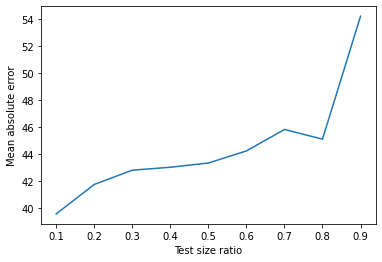

In [9]:
test_size_ratios = np.arange(0.1, 1, 0.1)
accuracies = [linear_regressor_mean(dataset=diabetes_rf, test_size_ratio=r) for r in test_size_ratios]
plt.plot(test_size_ratios, accuracies)
plt.xlabel('Test size ratio')
plt.ylabel('Mean absolute error')
plt.show()

## Q3 Naive k-features selection

In [10]:
def naive_k_features(k, train_set, test_set):

  def fit_linear(train_x, train_y, test_x, test_y):
      reg = LinearRegression().fit(train_x, train_y.values.ravel())
      mar = mean_absolute_error(y_true=test_y.values.ravel(), y_pred=reg.predict(test_x).ravel())
      return mar
  
  learnable_columns = diabetes_rf.columns[:-1]
  classes_column = list(diabetes_rf.columns[-1:])
  k_columns = [list(columns) for columns in list(combinations(learnable_columns, k))]
  ma_errors = [fit_linear(train_set[columns], train_set[classes_column], test_set[columns], test_set[classes_column]) for columns in k_columns]

  return k_columns[np.argmin(ma_errors)]

In [11]:
# Running the function we defined with k=2

train_set, test_set = train_test_split(diabetes_rf, test_size=0.8)

print("The best mininmal 2 absolute error columns are:")
print(naive_k_features(k=2, train_set=train_set, test_set=test_set))


print("The best mininmal 5 absolute error columns are:")
print(naive_k_features(k=5, train_set=train_set, test_set=test_set))

The best mininmal 2 absolute error columns are:
['BMI', 'S5']
The best mininmal 5 absolute error columns are:
['SEX', 'BMI', 'BP', 'S3', 'S5']
